<h1>Assignment 2</h1>

David Siegl

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import tweepy
import oauth2 as oauth
import matplotlib.pyplot as plt
from datetime import datetime
import nltk
import re
import string
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
from textblob import TextBlob
nltk.download("stopwords")
nltk.download("punkt")
plt.style.use('ggplot')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sched\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sched\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [22]:
api_key = "X"
api_secret = "X"
access_token_key = "X-X"
access_token_secret = "X"

auth = tweepy.OAuthHandler(api_key, api_secret)
auth.set_access_token(access_token_key, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

In [23]:
tweets_list = tweepy.Cursor(api.search_tweets, q="#elon musk", tweet_mode='extended').items(1000)

In [24]:
output = []
for tweet in tweets_list:
    text = tweet._json["full_text"]
    favourite_count = tweet.favorite_count
    retweet_count = tweet.retweet_count
    created_at = tweet.created_at
    language = tweet.lang
    is_retweet = tweet.retweeted
    user_name = tweet.user.screen_name
    
    
    line = {"text" : text, "favourite_count" : favourite_count, "retweet_count" : retweet_count, "created_at" : created_at, "language" : language, "is_retweet": is_retweet, "user_name" : user_name}
    output.append(line)
    
df_tweets = pd.DataFrame(output)

Unauthorized: 401 Unauthorized
89 - Invalid or expired token.

In [59]:
df_tweets.to_csv("tweets_musk.csv", header = ["text", "favourite_count", "retweet_count", "created_at", "language", "is_retweet", "user_name"])

In [2]:
df_tweets = pd.read_csv("tweets_musk.csv", index_col = 0)

In [61]:
users_list = df_tweets["user_name"].tolist()
users_list = users_list[0:99] #getting the information for the first 100 users since this is the maximum rate limit
users = api.lookup_users(screen_name = users_list)

output = []
for user in users:
    user_name = user.screen_name
    user_id = user.id
    favourite_count = user.favourites_count
    followers_count = user.followers_count
    is_verified = user.verified
    friends_count = user.friends_count

    line = {"user_name" : user_name, "user_id" : user_id, "favourite_count" : favourite_count, "followers_count" : followers_count, "is_verified" : is_verified, "friends_count" : friends_count}
    output.append(line)
    
df_users = pd.DataFrame(output)

In [63]:
df_users.to_csv("users_musk.csv", header = ["user_name", "user_id", "favourite_count", "followers_count", "is_verified", "friends_count"])

In [3]:
df_users = pd.read_csv("users_musk.csv", index_col = 0)

In [67]:
rt_tweets = df_tweets.nlargest(10, "retweet_count")
for i in range(9):
    print("-) " + rt_tweets["text"].iloc[i])

-) RT @LedaPlatform: Thanks @elonmusk ❤

#ElonMusk #elon #musk #nft #metaverse #game #leda #swan #cryptocurrency https://t.co/7RTi1lIKm2
-) RT @InsomPoramin: #Elon Musk ตัดสินใจไม่รับตำแหน่งบอร์ดบริหารของ #Twitter หลังจากได้เข้าถือหุ้นใหญ่เมื่อสัปดาห์ที่แล้ว
-) RT @InsomPoramin: #Elon Musk ตัดสินใจไม่รับตำแหน่งบอร์ดบริหารของ #Twitter หลังจากได้เข้าถือหุ้นใหญ่เมื่อสัปดาห์ที่แล้ว
-) RT @InsomPoramin: #Elon Musk ตัดสินใจไม่รับตำแหน่งบอร์ดบริหารของ #Twitter หลังจากได้เข้าถือหุ้นใหญ่เมื่อสัปดาห์ที่แล้ว
-) RT @InsomPoramin: #Elon Musk ตัดสินใจไม่รับตำแหน่งบอร์ดบริหารของ #Twitter หลังจากได้เข้าถือหุ้นใหญ่เมื่อสัปดาห์ที่แล้ว
-) RT @InsomPoramin: #Elon Musk ตัดสินใจไม่รับตำแหน่งบอร์ดบริหารของ #Twitter หลังจากได้เข้าถือหุ้นใหญ่เมื่อสัปดาห์ที่แล้ว
-) RT @InsomPoramin: #Elon Musk ตัดสินใจไม่รับตำแหน่งบอร์ดบริหารของ #Twitter หลังจากได้เข้าถือหุ้นใหญ่เมื่อสัปดาห์ที่แล้ว
-) RT @InsomPoramin: #Elon Musk ตัดสินใจไม่รับตำแหน่งบอร์ดบริหารของ #Twitter หลังจากได้เข้าถือหุ้นใหญ่เมื่อสัปดาห์ที่แล้ว
-) RT @In

In [69]:
fav_tweets = df_tweets.nlargest(10, "favourite_count")
for i in range(9):
    print("-) " + fav_tweets["text"].iloc[i])

-) I present you, the world's richest man - Elon Musk
☠️☠️😭😭🤯
.
.
#ElonMusk #ElonMuskTwitter #Twitter #tesla #elon #investment #stocks https://t.co/1AWSkgpTgO
-) #Dogecoin offline access might soon be available via #Elon Musk #Starlink technology #Crypto #Dogearmy #DOGE https://t.co/P4rqjTedY9
-) #Elon Musk ตัดสินใจไม่รับตำแหน่งบอร์ดบริหารของ #Twitter หลังจากได้เข้าถือหุ้นใหญ่เมื่อสัปดาห์ที่แล้ว
-) #Elon Musk, Twitter'ı 43 milyar dolara (hisse başına 54.20 dolar) nakit olarak satın almayı teklif etti.
-) #ELON MUSK IS BUYING #TWITTER https://t.co/3QQvl74Az8
-) #Grünheide kennt nach dem Bau des #Tesla-Werks jeder. Nach der feierliche Eröffnung warten viele Jugendliche noch auf die Umsetzung eines Versprechens von #Elon #Musk: den #Rave-Keller im Tesla-Werk. 
👉 https://t.co/8hR3U5CZsc https://t.co/NWzWrHGem2
-) Ick würde ja Twitter och kofen, dann wäre ick Euer Chef 😁😎, aber leider reicht mein Erspartes nicht. 👇

#Elon Musk will #Twitter komplett übernehmen: #Tesla-Chef gibt Angebot über

In [3]:
en_tweets = df_tweets.loc[(df_tweets["language"] == "en")]

In [4]:
stoplist_eng = nltk.corpus.stopwords.words("english")
stoplist_append = ["rt", '’', "x", 'e…', '…', '🌝'] #additionally removing some nonsensical entries
stoplist = stoplist_eng + stoplist_append

In [5]:
def clean_tweets(text):
    text = text.lower()
    text = re.sub('https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|www\.[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9]+\.[^\s]{2,}|www\.[a-zA-Z0-9]+\.[^\s]{2,}', "", text)
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    text = re.sub('\\n', '', text)
    text = re.sub('[0-9]*', '', text)
    return text

clean = lambda x: clean_tweets(x)

tweets_clean = pd.DataFrame(en_tweets.text.apply(clean_tweets))

In [18]:
string_tweets = tweets_clean.to_string(header=False, index=False, index_names=False)
string_token = nltk.word_tokenize(string_tweets)
string_token = [w for w in string_token if not w.lower() in stoplist]
c = Counter(string_token)
c.most_common(70)

[('elon', 1015),
 ('musk', 711),
 ('twitter', 501),
 ('elonmusk', 300),
 ('doge', 175),
 ('cardano', 171),
 ('elonmusktwitter', 168),
 ('buy', 137),
 ('crypto', 134),
 ('board', 117),
 ('tesla', 93),
 ('cryptocurrencynews', 87),
 ('invests', 85),
 ('cryptoada', 85),
 ('cardanoada', 85),
 ('soon', 74),
 ('cryptocurrency', 62),
 ('join', 54),
 ('ceo', 53),
 ('offers', 51),
 ('billion', 48),
 ('dogecoin', 48),
 ('man', 46),
 ('blockchain', 46),
 ('eth', 46),
 ('going', 45),
 ('via', 45),
 ('coin', 44),
 ('offer', 43),
 ('trade', 42),
 ('btc', 42),
 ('tweeting', 42),
 ('joining', 41),
 ('finthesentence', 41),
 ('meme', 41),
 ('moon', 41),
 ('twitters', 40),
 ('etfs', 40),
 ('leverage', 40),
 ('dogels', 40),
 ('company', 39),
 ('richest', 39),
 ('mexc', 39),
 ('shareholder', 36),
 ('starlink', 34),
 ('takeover', 34),
 ('worlds', 30),
 ('breaking', 30),
 ('share', 30),
 ('twtr', 29),
 ('offline', 29),
 ('technology', 29),
 ('take', 28),
 ('stake', 28),
 ('directors', 28),
 ('buying', 26),
 (

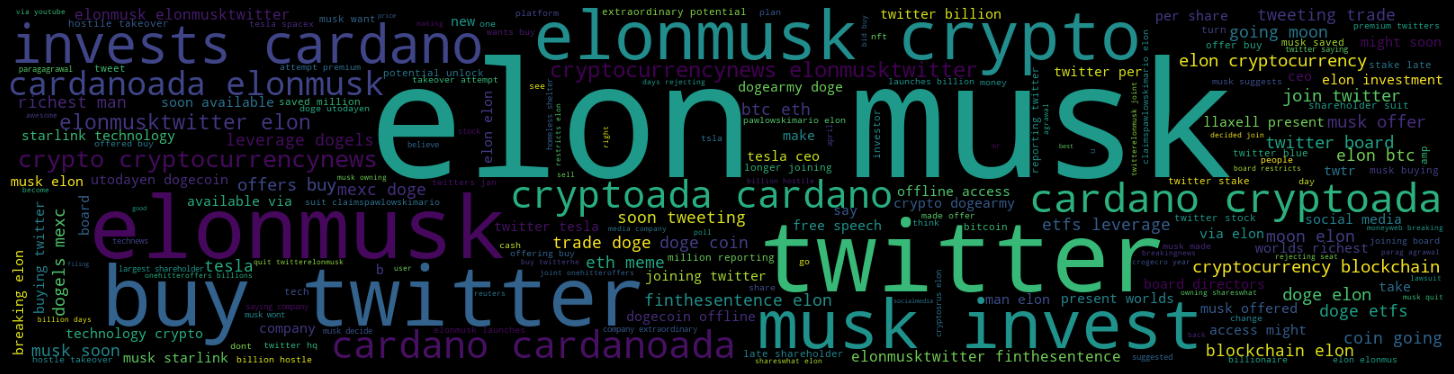

In [19]:
words = ' '.join(string_token)
wordcloud = WordCloud(width=1600, height=400).generate(words)

plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [8]:
pol = lambda x: TextBlob(x).sentiment.polarity

tweets_clean['polarity'] = tweets_clean['text'].apply(pol)

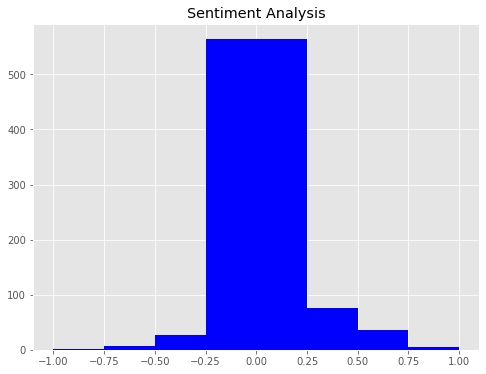

In [12]:
fig, ax = plt.subplots(figsize=(8, 6))

tweets_clean.hist(bins=[-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="blue")

plt.title("Sentiment Analysis")
plt.show()


In [92]:
df_tweets["created_at"] = pd.to_datetime(df_tweets["created_at"])
df_tweets["created_at"] = df_tweets["created_at"].dt.strftime("%Y-%m-%d")
df_streamgraph = df_tweets[~df_tweets["text"].str.startswith("RT", na = False)]
df_streamgraph = df_streamgraph[["created_at", "text"]]

In [93]:
def get_hashtags(text):
    text = text.lower()
    text = re.sub('https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|www\.[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9]+\.[^\s]{2,}|www\.[a-zA-Z0-9]+\.[^\s]{2,}', "", text)
    text = re.sub('\\n', '', text)
    text = re.sub('[0-9]*', '', text)
    text = re.findall(r"#(\w+)", text)
    return text

extract = lambda x: get_hashtags(x)

df_hashtags = pd.DataFrame(df_streamgraph.text.apply(get_hashtags))
df_hashtags["text"] = df_hashtags["text"].astype("string")

In [94]:
cv = CountVectorizer()
cv_hashtags = cv.fit_transform(df_hashtags.text)
cv_hashtags = pd.DataFrame(cv_hashtags.toarray(), columns=cv.get_feature_names_out())
cv_hashtags.index = df_hashtags.index

In [95]:
df_streamgraph = pd.concat([df_streamgraph, cv_hashtags], axis=1).reindex(df_streamgraph.index)

In [96]:
df_streamgraph = df_streamgraph.groupby(by = ["created_at"]).sum()

In [97]:
lst = [0, 1]
mask = df_streamgraph.isin(lst).all(axis=0)
df_streamgraph.drop(mask.loc[mask].index, axis=1, inplace=True)

In [98]:
s = df_streamgraph.sum(numeric_only=True, axis=0).sort_values(ascending = False, inplace = False)
df_top10_hashtags = df_streamgraph[s.index[:10]]

([], [])

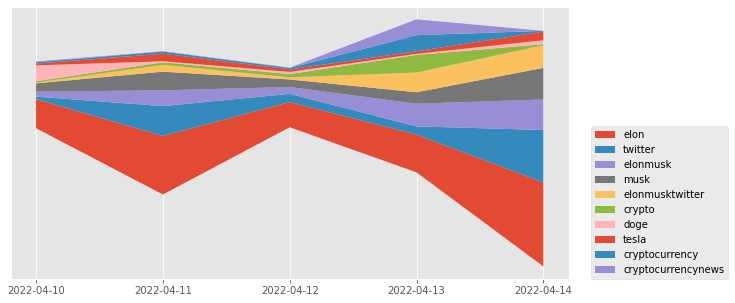

In [100]:
fig, ax = plt.subplots(figsize=(10,5))
ax.stackplot(df_top10_hashtags.index, df_top10_hashtags.T, baseline='wiggle', labels=df_top10_hashtags.columns)
ax.legend(loc=(1.04,0))
plt.yticks([])